# Predicting major 
based on past data

## Importing/Cleaning the data

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import numpy as np
import pandas as pd

e = pd.read_csv('../data/all_enrollment.csv')
fr = pd.read_csv('../data/fr_enrollment.csv')
so = pd.read_csv('../data/so_enrollment.csv')
jr = pd.read_csv('../data/jr_enrollment.csv')
sr = pd.read_csv('../data/sr_enrollment.csv')
s = pd.read_csv('../data/student.csv')

s = s[s.finalyear < 2016]
e = e[e.studentid.isin(s.studentid)]
fr = fr[fr.studentid.isin(s.studentid)]
so = so[so.studentid.isin(s.studentid)]
jr = jr[jr.studentid.isin(s.studentid)]
sr = sr[sr.studentid.isin(s.studentid)]

In [2]:
es = pd.merge(e, s[['studentid','finalmajor_full']], on='studentid')
frs = pd.merge(fr, s[['studentid','finalmajor_full']], on='studentid')
sos = pd.merge(so, s[['studentid','finalmajor_full']], on='studentid')
jrs = pd.merge(jr, s[['studentid','finalmajor_full']], on='studentid')
srs = pd.merge(sr, s[['studentid','finalmajor_full']], on='studentid')

In [3]:
es.head()

,AHS CAP SPR,AHS1101,AHS1102,AHS1105,AHS1110,AHS1111,AHS1120,AHS1122,AHS1130,AHS1140,...,SEM 303,SEM 401,SEM 402,SEM 501,SEM 502,SEM 503,SUST2201,SUST3301,studentid,finalmajor_full
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,10191843,Undeclared
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,10324389,Engineering Self Designed
2,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,10463379,Mechanical Engineering
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,10478316,Mechanical Engineering
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,10510869,Engineering Bioengineering


In [4]:
frdf = pd.get_dummies(frs, prefix='f', columns = ['finalmajor_full'])
sodf = pd.get_dummies(sos, prefix='f', columns = ['finalmajor_full'])
jrdf = pd.get_dummies(jrs, prefix='f', columns = ['finalmajor_full'])
srdf = pd.get_dummies(srs, prefix='f', columns = ['finalmajor_full'])

frdf.head()

,AHS CAP SPR,AHS1101,AHS1102,AHS1105,AHS1110,AHS1111,AHS1120,AHS1122,AHS1130,AHS1140,...,f_Engineering Computing,f_Engineering Design,f_Engineering Materials Science,f_Engineering Robotics,f_Engineering Self Designed,f_Engineering Systems,f_Engineering_Pending Self Designed,f_Exchange Student,f_Mechanical Engineering,f_Undeclared
0,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,1
1,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,1,0,0,0,0,0
2,False,True,False,False,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,1,0
3,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,1,0
4,False,False,False,False,False,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning
Predicting majors based on the classes they have taken

In [5]:
# importing ML library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing

In [6]:
to_predict = srdf.columns.values.tolist()
predictors = srs.columns.values.tolist()

Majors to predict

In [8]:
# for i in predictors:
#     to_predict.remove(i)
print to_predict

["f_Electr'l & Computer Engr", 'f_Engineering', 'f_Engineering Bioengineering', 'f_Engineering Computing', 'f_Engineering Design', 'f_Engineering Materials Science', 'f_Engineering Robotics', 'f_Engineering Self Designed', 'f_Engineering Systems', 'f_Engineering_Pending Self Designed', 'f_Exchange Student', 'f_Mechanical Engineering', 'f_Undeclared']


Predictors (Classes that the students have taken)

In [14]:
# predictors.remove('studentid')
# predictors.remove('finalmajor_full')
# for p in predictors:
#     if p[:3] == 'SEM':
#         predictors.remove(p)
print predictors

['AHS CAP SPR', 'AHS1101', 'AHS1102', 'AHS1105', 'AHS1110', 'AHS1111', 'AHS1120', 'AHS1122', 'AHS1130', 'AHS1140', 'AHS1150', 'AHS2110', 'AHSE0112', 'AHSE1100', 'AHSE1101', 'AHSE1102', 'AHSE1122', 'AHSE1130', 'AHSE1135', 'AHSE1140', 'AHSE1145', 'AHSE1150', 'AHSE1155', 'AHSE1199', 'AHSE11BA', 'AHSE1500', 'AHSE1515', 'AHSE1599', 'AHSE2110', 'AHSE2112', 'AHSE2114', 'AHSE2120', 'AHSE2130', 'AHSE2131', 'AHSE2140', 'AHSE2141', 'AHSE2170', 'AHSE2199', 'AHSE2199A', 'AHSE2199B', 'AHSE2199C', 'AHSE2199E', 'AHSE2199F', 'AHSE3100', 'AHSE3130', 'AHSE3190', 'AHSE3199', 'AHSE3199A', 'AHSE3500', 'AHSE3510', 'AHSE3599', 'AHSE4190', 'AHSE4198', 'AHSE4199', 'AHSE4590', 'AHSE4598', 'AWAY1000', 'BAB1001', 'BAB5001', 'CD1097', 'CIE2016A', 'E! CAP SPR', 'ECE2910', 'ELE1010', 'ELE1020', 'ELE1025', 'ELE1050', 'ELE1090', 'ELE2710', 'ELE2715', 'ENG1510', 'ENGR0097', 'ENGR0098', 'ENGR0098X', 'ENGR1097', 'ENGR1110', 'ENGR1120', 'ENGR1121', 'ENGR1125', 'ENGR1199', 'ENGR1199A', 'ENGR1200', 'ENGR1330', 'ENGR1510', 'E

### The p value of each course for each major for different grades

In [15]:
d = pd.DataFrame(columns=predictors)
d.head()

,AHS CAP SPR,AHS1101,AHS1102,AHS1105,AHS1110,AHS1111,AHS1120,AHS1122,AHS1130,AHS1140,...,SCI3098,SCI3110,SCI3120,SCI3130,SCI3199,SCI3210,SCI3320,SCI4198,SUST2201,SUST3301


In [16]:
d = pd.DataFrame(columns=predictors)
grmajorlist = []
majorlist = []
grlist = []

for i in range(len(to_predict)): # for each major
    #     freshman
    grmajorlist.append('fr '+to_predict[i][2:])
    grlist.append('fr')
    majorlist.append(to_predict[i][2:])
    selector = SelectKBest(f_classif, k=5)
    selector.fit(frdf[predictors], frdf[to_predict[i]])
    scores = -np.log10(selector.pvalues_)
    to_append = pd.DataFrame([scores], columns = predictors)
    d = d.append(to_append)
    #     sophomore
    grmajorlist.append('so '+to_predict[i][2:])
    grlist.append('so')
    majorlist.append(to_predict[i][2:])
    selector = SelectKBest(f_classif, k=5)
    selector.fit(sodf[predictors], sodf[to_predict[i]])
    scores = -np.log10(selector.pvalues_)
    to_append = pd.DataFrame([scores], columns = predictors)
    d = d.append(to_append)
    #     junior
    grmajorlist.append('jr '+to_predict[i][2:])
    grlist.append('jr')
    majorlist.append(to_predict[i][2:])
    selector = SelectKBest(f_classif, k=5)
    selector.fit(jrdf[predictors], jrdf[to_predict[i]])
    scores = -np.log10(selector.pvalues_)
    to_append = pd.DataFrame([scores], columns = predictors)
    d = d.append(to_append)
    #     senior
    grmajorlist.append('sr '+to_predict[i][2:])
    grlist.append('sr')
    majorlist.append(to_predict[i][2:])
    selector = SelectKBest(f_classif, k=5)
    selector.fit(srdf[predictors], srdf[to_predict[i]])
    scores = -np.log10(selector.pvalues_)
    to_append = pd.DataFrame([scores], columns = predictors)
    d = d.append(to_append, ignore_index=True)

/home/jkim/anaconda2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [  0  11  24  27  32  34  36  41  42  43  44  45  46  47  48  51  52  53
  54  55  56  58  59  60  61  62  68  73  74  80  82  91  98 101 102 103
 104 105 106 107 108 111 112 113 114 115 116 117 118 122 123 124 126 127
 128 130 133 134 135 136 137 138 139 140 141 143 144 148 149 151 154 156
 158 159 162 163 164 165 166 167 168 169 171 172 186 187 188 194 196 198
 201 202 204 208 217 218 221 223 231 235 236 237 238 239 240 241 242 247
 248 249 250 260 265 267 268 269 275 277 281 282 284 286 287 288 289 290
 291] are constant.
  UserWarning)
/home/jkim/anaconda2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [  0  36  41  42  43  46  47  48  51  53  54  55  56  58  60  61  73 105
 112 113 114 115 116 118 122 133 135 137 139 143 144 149 158 162 164 169
 171 172 217 218 247 250 265 269 282 286 291] are consta

In [17]:
d['grmajor'] = grmajorlist
d['major'] = majorlist
d['gr'] = grlist
d.head(100)

,AHS CAP SPR,AHS1101,AHS1102,AHS1105,AHS1110,AHS1111,AHS1120,AHS1122,AHS1130,AHS1140,...,SCI3130,SCI3199,SCI3210,SCI3320,SCI4198,SUST2201,SUST3301,grmajor,major,gr
0,NaN,0.556606,0.786574,0.483348,0.529304,0.432213,0.644825,0.195325,0.465271,0.046745,...,1.020739,NaN,NaN,NaN,NaN,NaN,NaN,fr Electr'l & Computer Engr,Electr'l & Computer Engr,fr
1,NaN,0.556606,0.786574,0.048037,0.802103,0.722307,0.249706,0.007021,0.618109,0.046745,...,0.640466,NaN,0.401691,0.626715,0.401691,0.951022,NaN,so Electr'l & Computer Engr,Electr'l & Computer Engr,so
2,NaN,0.556606,0.786574,0.048037,0.802103,0.817024,0.249706,0.007021,0.618109,0.046745,...,0.004299,0.128619,0.746693,0.722307,1.281562,1.014140,0.260320,jr Electr'l & Computer Engr,Electr'l & Computer Engr,jr
3,3.091417,0.556606,0.786574,0.048037,0.802103,0.817024,0.249706,0.007021,0.618109,0.046745,...,0.311633,0.046745,1.150417,0.911002,2.377557,1.014140,0.440101,sr Electr'l & Computer Engr,Electr'l & Computer Engr,sr
4,NaN,1.295399,1.980260,0.264650,4.568190,0.231001,0.195637,0.667115,11.659585,0.213207,...,0.071331,NaN,NaN,NaN,NaN,NaN,NaN,fr Engineering,Engineering,fr
5,NaN,1.295399,1.980260,0.355802,5.768187,0.502692,0.100766,1.423328,10.298506,0.213207,...,0.296361,NaN,0.104048,0.264650,0.104048,0.397945,NaN,so Engineering,Engineering,so
6,NaN,1.295399,1.980260,0.355802,5.768187,0.439339,0.100766,1.423328,10.298506,0.213207,...,0.397945,1.344955,0.174844,0.280711,0.370042,0.478137,0.071331,jr Engineering,Engineering,jr
7,0.465024,1.295399,1.980260,0.355802,5.768187,0.439339,0.100766,1.423328,10.298506,0.213207,...,0.057882,0.915807,0.248110,0.311655,1.870092,0.478137,0.311655,sr Engineering,Engineering,sr
8,NaN,0.424290,0.306473,0.437793,1.456236,0.378506,0.251914,0.408550,0.125123,0.347487,...,0.110305,NaN,NaN,NaN,NaN,NaN,NaN,fr Engineering Bioengineering,Engineering Bioengineering,fr
9,NaN,0.424290,0.306473,0.602031,1.116058,0.466364,0.567078,0.409292,0.176662,0.347487,...,0.494364,NaN,6.228627,4.070357,0.163165,0.151001,NaN,so Engineering Bioengineering,Engineering Bioengineering,so


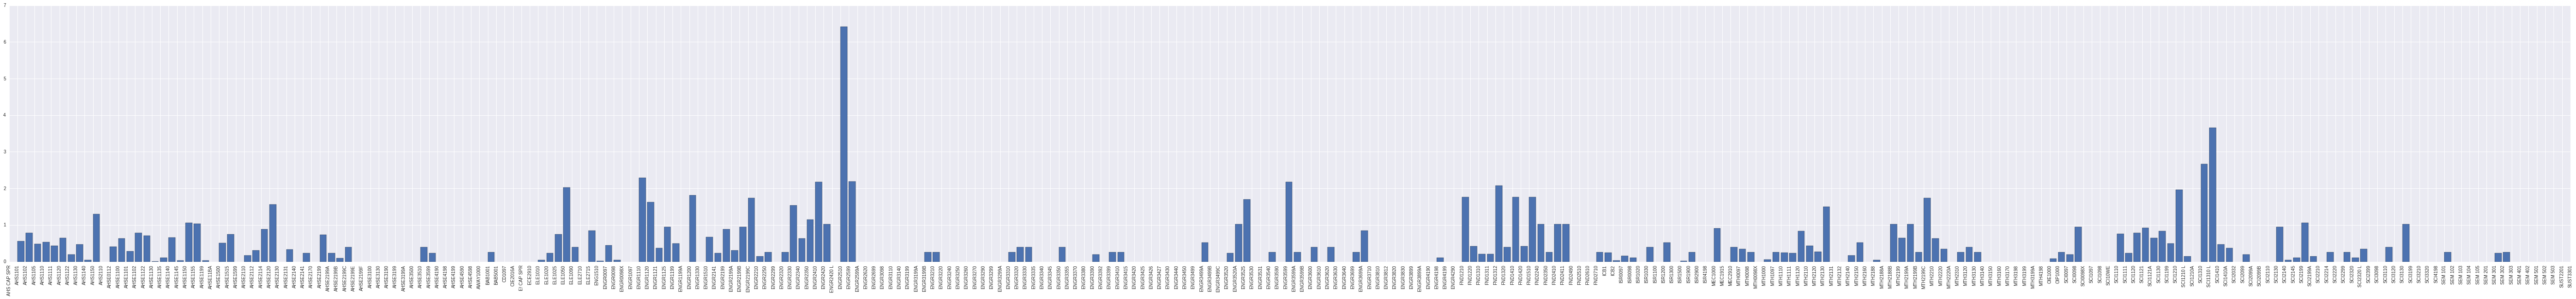

In [122]:
# # Plot the scores for different features
# plt.figure(figsize=(100,10))
# plt.bar(range(len(predictors)), scores)
# plt.xticks(range(len(predictors)), predictors, rotation='vertical')
# plt.show()

In [18]:
d.to_csv('../data/predictingmajor_pval.csv', index=False)

In [19]:
# Checking the higher p values
for p in predictors:
    for i, element in enumerate(d[p]):
        if element > 50:
            print d.grmajor[i]
            print p, element

sr Undeclared
AHS CAP SPR 65.8161119957
so Mechanical Engineering
ENGR2320 60.3858813747
jr Mechanical Engineering
ENGR2320 74.4170233954
sr Mechanical Engineering
ENGR2320 74.4769918301
jr Mechanical Engineering
ENGR2340 59.1892366113
sr Mechanical Engineering
ENGR2340 74.0990201024
so Mechanical Engineering
ENGR2350 50.6054144093
jr Mechanical Engineering
ENGR2350 80.8626075787
sr Mechanical Engineering
ENGR2350 91.6885817851
so Electr'l & Computer Engr
ENGR2410 92.3025742857
jr Electr'l & Computer Engr
ENGR2410 108.568879652
sr Electr'l & Computer Engr
ENGR2410 105.332238702
jr Electr'l & Computer Engr
ENGR2420 92.0680261689
sr Electr'l & Computer Engr
ENGR2420 122.766103943
fr Exchange Student
ENGR3210 inf
jr Mechanical Engineering
ENGR3310 97.5350322799
sr Mechanical Engineering
ENGR3310 173.943836285
jr Mechanical Engineering
ENGR3330 87.6016717352
sr Mechanical Engineering
ENGR3330 147.679760625
sr Engineering Robotics
ENGR3392 57.3431926861
jr Electr'l & Computer Engr
ENGR3410 

## Testing the accuracy of Random Forest Classifier

### Predicting all the majors together

Freshman

In [21]:
alg = RandomForestClassifier(random_state=1, n_estimators=120, min_samples_split=4, min_samples_leaf=2)
scores = cross_validation.cross_val_score(alg, frs[predictors], frs["finalmajor_full"], cv=3)

print(scores.mean())

0.348979378986


Sophomore

In [22]:
alg = RandomForestClassifier(random_state=1, n_estimators=120, min_samples_split=4, min_samples_leaf=2)
scores = cross_validation.cross_val_score(alg, sos[predictors], sos["finalmajor_full"], cv=3)

print(scores.mean())

0.57473207055


Junior

In [23]:
alg = RandomForestClassifier(random_state=1, n_estimators=120, min_samples_split=4, min_samples_leaf=2)
scores = cross_validation.cross_val_score(alg, jrs[predictors], jrs["finalmajor_full"], cv=3)

print(scores.mean())

0.684954553369


Senior

In [24]:
alg = RandomForestClassifier(random_state=1, n_estimators=120, min_samples_split=4, min_samples_leaf=2)
scores = cross_validation.cross_val_score(alg, srs[predictors], srs["finalmajor_full"], cv=3)

print(scores.mean())

0.74622868338


The results aren't great. We want to gain high accuracy when the grade of the students are lower - this will help the students the most. We are going to try predicting separately for each majors

### Predicting all the majors separately

Freshman

In [44]:
for i in range(len(to_predict)):
    alg = RandomForestClassifier(random_state=1, n_estimators=120, min_samples_split=4, min_samples_leaf=2)
    scores = cross_validation.cross_val_score(alg, frdf[predictors], frdf[to_predict[i]], cv=3)

    print (to_predict[i], scores.mean())

("f_Electr'l & Computer Engr", 0.73325702151661443)
('f_Engineering', 0.96474725858093213)
('f_Engineering Bioengineering', 0.92479904118364231)
('f_Engineering Computing', 0.92832434442997958)
('f_Engineering Design', 0.98825449961771328)
('f_Engineering Materials Science', 0.95887456659864956)
('f_Engineering Robotics', 0.97884835514855917)
('f_Engineering Self Designed', 0.92714709932148842)
('f_Engineering Systems', 0.94359561372949108)
('f_Engineering_Pending Self Designed', 0.99883040935672518)
('f_Exchange Student', 0.99883040935672518)
('f_Mechanical Engineering', 0.75324530407290313)
('f_Undeclared', 0.91891802533424249)


Sophomore

In [37]:
for i in range(len(to_predict)):
    alg = RandomForestClassifier(random_state=1, n_estimators=120, min_samples_split=4, min_samples_leaf=2)
    scores = cross_validation.cross_val_score(alg, sodf[predictors], sodf[to_predict[i]], cv=3)

    print (to_predict[i], scores.mean())

("f_Electr'l & Computer Engr", 0.86599810879410744)
('f_Engineering', 0.96474725858093213)
('f_Engineering Bioengineering', 0.9294939350732544)
('f_Engineering Computing', 0.9294939350732544)
('f_Engineering Design', 0.98825449961771328)
('f_Engineering Materials Science', 0.95887456659864956)
('f_Engineering Robotics', 0.97884835514855917)
('f_Engineering Self Designed', 0.92714709932148842)
('f_Engineering Systems', 0.94359561372949108)
('f_Engineering_Pending Self Designed', 0.99883040935672518)
('f_Exchange Student', 0.99883040935672518)
('f_Mechanical Engineering', 0.88131754592606371)
('f_Undeclared', 0.92832434442997958)


Junior

In [38]:
for i in range(len(to_predict)):
    alg = RandomForestClassifier(random_state=1, n_estimators=120, min_samples_split=4, min_samples_leaf=2)
    scores = cross_validation.cross_val_score(alg, jrdf[predictors], jrdf[to_predict[i]], cv=3)

    print (to_predict[i], scores.mean())

("f_Electr'l & Computer Engr", 0.92006337198692745)
('f_Engineering', 0.96474725858093213)
('f_Engineering Bioengineering', 0.94477300436013467)
('f_Engineering Computing', 0.93185791333457324)
('f_Engineering Design', 0.98825449961771328)
('f_Engineering Materials Science', 0.96122613182036865)
('f_Engineering Robotics', 0.97884835514855917)
('f_Engineering Self Designed', 0.92714709932148842)
('f_Engineering Systems', 0.94359561372949108)
('f_Engineering_Pending Self Designed', 0.99883040935672518)
('f_Exchange Student', 0.99883040935672518)
('f_Mechanical Engineering', 0.9294691380984853)
('f_Undeclared', 0.94240902609881594)


Senior

In [42]:
for i in range(len(to_predict)):
    alg = RandomForestClassifier(random_state=1, n_estimators=120, min_samples_split=4, min_samples_leaf=2)
    scores = cross_validation.cross_val_score(alg, srdf[predictors], srdf[to_predict[i]], cv=3)

    print (to_predict[i], scores.mean())

("f_Electr'l & Computer Engr", 0.93888004114202284)
('f_Engineering', 0.96474725858093213)
('f_Engineering Bioengineering', 0.95537371107391567)
('f_Engineering Computing', 0.9412642324303101)
('f_Engineering Design', 0.98825449961771328)
('f_Engineering Materials Science', 0.96239569335921293)
('f_Engineering Robotics', 0.97884835514855917)
('f_Engineering Self Designed', 0.92714709932148842)
('f_Engineering Systems', 0.94359561372949108)
('f_Engineering_Pending Self Designed', 0.99883040935672518)
('f_Exchange Student', 0.99883040935672518)
('f_Mechanical Engineering', 0.95531585146612119)
('f_Undeclared', 0.9612051329737773)


Really like what I am seeing here but let me test Logistic Regression too

## Testing the accuracy of Logistic Regression

### Predicting all the majors together

In [46]:
# Freshman
alg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, frs[predictors], frs["finalmajor_full"])

print(scores.mean())

0.341989958269


In [48]:
# Sophomore
alg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, sos[predictors], sos["finalmajor_full"])

print(scores.mean())

0.573455702682


In [49]:
# Junior
alg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, jrs[predictors], jrs["finalmajor_full"], cv=3)

print(scores.mean())

0.675636299576


In [51]:
# Senior
alg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, srs[predictors], srs["finalmajor_full"], cv=3)

print(scores.mean())

0.76263399394


Trying to predict all the majors together yield similar results to using Random Forest Classifier.

### Predicting the majors separately

In [74]:
print 'Freshman'
for i in range(len(to_predict)):
    if i in [9, 10]:
        continue
    else:
        alg = LogisticRegression(random_state=1)
        scores = cross_validation.cross_val_score(alg, frdf[predictors], frdf[to_predict[i]])
        print (to_predict[i], scores.mean())


Freshman
("f_Electr'l & Computer Engr", 0.71562235604439361)
('f_Engineering', 0.96357354966074416)
('f_Engineering Bioengineering', 0.92597689748517353)
('f_Engineering Computing', 0.9248073068418986)
('f_Engineering Design', 0.98825449961771328)
('f_Engineering Materials Science', 0.95887456659864956)
('f_Engineering Robotics', 0.97884835514855917)
('f_Engineering Self Designed', 0.92714709932148842)
('f_Engineering Systems', 0.94359561372949108)
('f_Mechanical Engineering', 0.7567788729774968)
('f_Undeclared', 0.92008761597751743)


In [73]:
print 'Sophomore'
for i in range(len(to_predict)):
    if i in [9, 10]:
        continue
    else:
        alg = LogisticRegression(random_state=1)
        scores = cross_validation.cross_val_score(alg, sodf[predictors], sodf[to_predict[i]])
        print (to_predict[i], scores.mean())


Sophomore
("f_Electr'l & Computer Engr", 0.86837870568523023)
('f_Engineering', 0.96239569335921293)
('f_Engineering Bioengineering', 0.9518566734858348)
('f_Engineering Computing', 0.92478250986712951)
('f_Engineering Design', 0.98825449961771328)
('f_Engineering Materials Science', 0.9588704192173062)
('f_Engineering Robotics', 0.97884835514855917)
('f_Engineering Self Designed', 0.91892698949883045)
('f_Engineering Systems', 0.93890077804874006)
('f_Mechanical Engineering', 0.88482631785588828)
('f_Undeclared', 0.92597689748517353)


In [72]:
print 'Junior'
for i in range(len(to_predict)):
    if i in [9, 10]:
        continue
    else:
        alg = LogisticRegression(random_state=1)
        scores = cross_validation.cross_val_score(alg, jrdf[predictors], jrdf[to_predict[i]])
        print (to_predict[i], scores.mean())


Junior
("f_Electr'l & Computer Engr", 0.91184326216426947)
('f_Engineering', 0.9623998407405564)
('f_Engineering Bioengineering', 0.96358564255160883)
('f_Engineering Computing', 0.94125596677205381)
('f_Engineering Design', 0.98707664331618206)
('f_Engineering Materials Science', 0.97414937208646479)
('f_Engineering Robotics', 0.97767879360971488)
('f_Engineering Self Designed', 0.93418935284261517)
('f_Engineering Systems', 0.93889248328605313)
('f_Mechanical Engineering', 0.9189014940177298)
('f_Undeclared', 0.93067179137478562)


In [71]:
print 'Senior'
for i in range(len(to_predict)):
    if i in [9, 10]:
        continue
    else:
        alg = LogisticRegression(random_state=1)
        scores = cross_validation.cross_val_score(alg, srdf[predictors], srdf[to_predict[i]])
        print (to_predict[i], scores.mean())


Senior
("f_Electr'l & Computer Engr", 0.923596940891521)
('f_Engineering', 0.96122613182036865)
('f_Engineering Bioengineering', 0.96358564255160883)
('f_Engineering Computing', 0.94125596677205381)
('f_Engineering Design', 0.99061021222077572)
('f_Engineering Materials Science', 0.98354733821065377)
('f_Engineering Robotics', 0.9776746462283713)
('f_Engineering Self Designed', 0.92713465717745802)
('f_Engineering Systems', 0.95064616201330476)
('f_Mechanical Engineering', 0.94476473870187838)
('f_Undeclared', 0.96356084557683952)


Similar Result to Random Forest Classifier.

### Making Predictions

In [155]:
print to_predict

["f_Electr'l & Computer Engr", 'f_Engineering', 'f_Engineering Bioengineering', 'f_Engineering Computing', 'f_Engineering Design', 'f_Engineering Materials Science', 'f_Engineering Robotics', 'f_Engineering Self Designed', 'f_Engineering Systems', 'f_Engineering_Pending Self Designed', 'f_Exchange Student', 'f_Mechanical Engineering', 'f_Undeclared']


In [175]:
for i in range(len(to_predict)):
    if i in [9,10,12]:
        continue
    else:
        
        alg = LogisticRegression(random_state=1)
        alg.fit(frdf[predictors], frdf[to_predict[i]])
        predictions = alg.predict_proba(fr[predictors])[:,1]
        fr[to_predict[i]] = predictions

In [179]:
fr['total'] = (fr["f_Electr'l & Computer Engr"]
               +fr['f_Engineering']
               +fr['f_Engineering Bioengineering']
               +fr['f_Engineering Computing']
               +fr['f_Engineering Design']
               +fr['f_Engineering Materials Science']
               +fr['f_Engineering Robotics']
               +fr['f_Engineering Self Designed']
               +fr['f_Engineering Systems']
               +fr['f_Mechanical Engineering'])
fr['ece'] = fr["f_Electr'l & Computer Engr"]/fr['total']
fr['eng'] = fr['f_Engineering']/fr['total']
fr['bio'] = fr['f_Engineering Bioengineering']/fr['total']
fr['cs'] = fr['f_Engineering Computing']/fr['total']
fr['design'] = fr['f_Engineering Design']/fr['total']
fr['matsci'] = fr['f_Engineering Materials Science']/fr['total']
fr['robo'] = fr['f_Engineering Robotics']/fr['total']
fr['sd'] = fr['f_Engineering Self Designed']/fr['total']
fr['sys'] = fr['f_Engineering Systems']/fr['total']
fr['me'] = fr['f_Mechanical Engineering']/fr['total']

In [180]:
fr.head()

,AHS CAP SPR,AHS1101,AHS1102,AHS1105,AHS1110,AHS1111,AHS1120,AHS1122,AHS1130,AHS1140,...,ece,eng,bio,cs,design,matsci,robo,sd,sys,me
1,False,False,False,False,False,False,False,False,False,False,...,0.171635,0.035038,0.068716,0.139594,0.220445,0.020856,0.179146,0.051130,0.056297,0.057143
3,False,False,False,False,False,False,False,False,False,False,...,0.124506,0.079385,0.218559,0.049115,0.001926,0.021629,0.002948,0.255801,0.021746,0.224386
4,False,True,False,False,False,True,False,False,False,False,...,0.234452,0.071366,0.089242,0.035803,0.005238,0.199222,0.004949,0.005289,0.041344,0.313094
5,False,False,False,False,False,False,False,False,False,False,...,0.071301,0.006359,0.028150,0.038871,0.015876,0.014726,0.026049,0.014259,0.000656,0.783752
6,False,False,False,False,False,False,False,False,False,False,...,0.365349,0.016280,0.220671,0.028427,0.004214,0.135244,0.001430,0.112969,0.002396,0.113021


In [181]:
pfrs = pd.merge(fr, s[['studentid','finalmajor_full']], on='studentid')

In [187]:
pfrs[["f_Electr'l & Computer Engr", 'f_Engineering', 'f_Engineering Bioengineering', 
      'f_Engineering Computing', 'f_Engineering Design', 'f_Engineering Materials Science', 
      'f_Engineering Robotics', 'f_Engineering Self Designed', 'f_Engineering Systems',
      'f_Mechanical Engineering', 'finalmajor_full']].head(100)

,f_Electr'l & Computer Engr,f_Engineering,f_Engineering Bioengineering,f_Engineering Computing,f_Engineering Design,f_Engineering Materials Science,f_Engineering Robotics,f_Engineering Self Designed,f_Engineering Systems,f_Mechanical Engineering,finalmajor_full
0,0.061537,0.012562,0.024637,0.050049,0.079037,0.007478,0.064230,0.018332,0.020185,0.020488,Undeclared
1,0.128934,0.082208,0.226331,0.050861,0.001994,0.022398,0.003052,0.264897,0.022519,0.232366,Engineering Self Designed
2,0.161944,0.049295,0.061643,0.024730,0.003618,0.137610,0.003419,0.003653,0.028557,0.216265,Mechanical Engineering
3,0.080935,0.007218,0.031954,0.044123,0.018021,0.016715,0.029569,0.016186,0.000745,0.889642,Mechanical Engineering
4,0.392931,0.017509,0.237330,0.030573,0.004532,0.145453,0.001538,0.121497,0.002576,0.121553,Engineering Bioengineering
5,0.109854,0.006309,0.049824,0.025364,0.010925,0.008505,0.027806,0.167219,0.022974,0.434830,Mechanical Engineering
6,0.213753,0.006502,0.047993,0.017563,0.000810,0.152925,0.005985,0.097231,0.038382,0.285003,Engineering Bioengineering
7,0.420105,0.018360,0.008369,0.309367,0.053892,0.008280,0.059567,0.023866,0.004745,0.033504,Engineering Design
8,0.435357,0.011656,0.032898,0.288673,0.004258,0.009721,0.003175,0.145529,0.010652,0.099118,Electr'l & Computer Engr
9,0.261907,0.004196,0.041230,0.048814,0.113919,0.008903,0.088539,0.024732,0.005230,0.427580,Mechanical Engineering


In [188]:
pfrs[['ece','eng','bio','cs','design','matsci','robo','sd','sys','me', 'finalmajor_full']].head(100)

,ece,eng,bio,cs,design,matsci,robo,sd,sys,me,finalmajor_full
0,0.171635,0.035038,0.068716,0.139594,0.220445,0.020856,0.179146,0.051130,0.056297,0.057143,Undeclared
1,0.124506,0.079385,0.218559,0.049115,0.001926,0.021629,0.002948,0.255801,0.021746,0.224386,Engineering Self Designed
2,0.234452,0.071366,0.089242,0.035803,0.005238,0.199222,0.004949,0.005289,0.041344,0.313094,Mechanical Engineering
3,0.071301,0.006359,0.028150,0.038871,0.015876,0.014726,0.026049,0.014259,0.000656,0.783752,Mechanical Engineering
4,0.365349,0.016280,0.220671,0.028427,0.004214,0.135244,0.001430,0.112969,0.002396,0.113021,Engineering Bioengineering
5,0.127203,0.007306,0.057692,0.029369,0.012650,0.009848,0.032197,0.193628,0.026603,0.503503,Mechanical Engineering
6,0.246786,0.007506,0.055410,0.020277,0.000936,0.176558,0.006910,0.112256,0.044314,0.329047,Engineering Bioengineering
7,0.446894,0.019531,0.008902,0.329095,0.057329,0.008808,0.063365,0.025388,0.005048,0.035640,Engineering Design
8,0.418196,0.011196,0.031601,0.277294,0.004090,0.009337,0.003050,0.139792,0.010232,0.095211,Electr'l & Computer Engr
9,0.255507,0.004093,0.040222,0.047621,0.111135,0.008686,0.086376,0.024128,0.005103,0.417130,Mechanical Engineering


In [190]:
c = pd.read_csv('../data/course.csv')

In [215]:
freshmanclasses = {}
for column in predictors:
    for element in fr[column]:
        if element:
            if column in freshmanclasses.keys():
                freshmanclasses[column] += 1
            else:
                freshmanclasses[column] = 1
                
freshmanclasses

{'AHS1101': 46,
 'AHS1102': 50,
 'AHS1105': 10,
 'AHS1110': 28,
 'AHS1111': 8,
 'AHS1120': 18,
 'AHS1122': 9,
 'AHS1130': 18,
 'AHS1140': 7,
 'AHS1150': 23,
 'AHSE0112': 61,
 'AHSE1100': 134,
 'AHSE1101': 25,
 'AHSE1102': 27,
 'AHSE1122': 112,
 'AHSE1130': 49,
 'AHSE1135': 3,
 'AHSE1140': 37,
 'AHSE1145': 8,
 'AHSE1150': 30,
 'AHSE1155': 49,
 'AHSE1199': 229,
 'AHSE1500': 294,
 'AHSE1515': 5,
 'AHSE2110': 41,
 'AHSE2112': 5,
 'AHSE2114': 8,
 'AHSE2120': 4,
 'AHSE2131': 7,
 'AHSE2141': 6,
 'AHSE2199': 31,
 'AHSE2199A': 54,
 'AHSE2199B': 10,
 'AHSE2199C': 2,
 'AHSE3510': 2,
 'AHSE3599': 6,
 'BAB1001': 1,
 'ELE1010': 12,
 'ELE1020': 6,
 'ELE1025': 5,
 'ELE1050': 27,
 'ELE1090': 2,
 'ELE2715': 6,
 'ENG1510': 11,
 'ENGR0097': 50,
 'ENGR0098': 43,
 'ENGR1110': 692,
 'ENGR1120': 452,
 'ENGR1121': 199,
 'ENGR1125': 7,
 'ENGR1199': 7,
 'ENGR1200': 700,
 'ENGR1510': 99,
 'ENGR2141': 6,
 'ENGR2199': 8,
 'ENGR2199A': 5,
 'ENGR2199B': 3,
 'ENGR2199C': 2,
 'ENGR2210': 81,
 'ENGR2250': 1,
 'ENGR2320'